# Workshop 1
# Exploratory analysis of a property price dataset

## Objectives:
1. Perform dataset cleanup: devise strategies to deal with missing data on certain variables.
2. Carry out a descriptive analysis of the main variables.
3. Create new columns from the given characteristics that may have predictive value.

## Download the worked dataset:
https://drive.google.com/file/d/0BzVrTKc02N8qNUdDSExBQlFTNlU/view

## Requirements and material to deliver
1. A jupyter notebook/lab that meets the project requirements, where the cleaning and analysis of the data to be delivered is performed and displayed. The notebook must be properly commented, and must be able to run without errors from start to finish.
2. A presentation of no more than 10 minutes of the work done, consisting of a presentation accompanied by some non-technical slides (PPT or Google Slides).

This presentation must consist of:
- An introduction (statement of the problem, the question, the description of the dataset, etc.).
- A development of the analyzes carried out (descriptive analysis, preliminary correlation analysis, preliminary visualizations).
- An exposition of the main results and conclusions.

## General dataset information
The dataset contains information about all the georeferenced properties in the company database. The information of each property that it includes is the following:
- ID registration
- Type of property (house, apartment, ph)
- Ad operation (sell, rent)
- Name of the place
- Name of the place + name of their 'parents'
- Geonames ID of the place (if available)
- Latitude Longitude
- Original price of the ad
- Original currency of the notice (ARS, USD)
- Ad price in local currency (ARS)
- Approximate price in USD
- Area in m2
- Covered area in m2
- Price in USD/m2
- Price per m2
- Floor number, if applicable
- Environments
- URL in Properati
- Description
- Title
- URL of a thumbnail of the first photo

## Libraries to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Initial dataset exploration

#### Upload of the original file supplied.

In [2]:
data_original = pd.read_csv('properatti.csv')

#### A copy of the dataset is created so as not to alter the original.

In [3]:
data = data_original.copy()
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


#### Dataset statistical information.

In [4]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


#### Amount of non-null data in the dataset.

In [5]:
data.notna().sum()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

#### Amount of null data from the dataset.

In [6]:
data.isna().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

#### Number of rows and columns contained in the dataset.

In [7]:
data.shape

(121220, 26)

#### A bar chart is created showing the relationship between the amount of null and non-null data for some variables in the dataset.

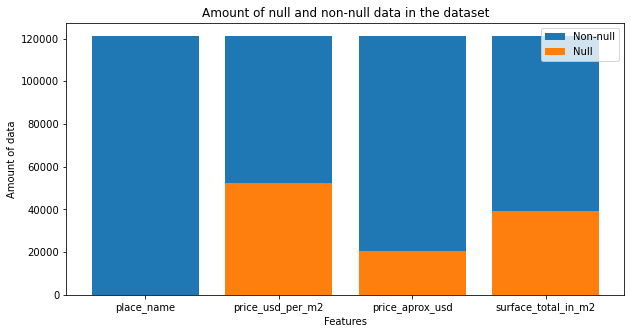

In [8]:
columns = ['place_name','price_usd_per_m2','price_aprox_usd','surface_total_in_m2']
null = data[columns].isna().sum().values
not_null = data[columns].notna().sum().values

plt.figure(figsize = (10,5), edgecolor = 'blue')
plt.bar(columns, not_null, label = 'Non-null', bottom = null)
plt.bar(columns, null, label = 'Null')

plt.xticks(columns)
plt.ylabel("Amount of data")
plt.xlabel("Features")
plt.title('Amount of null and non-null data in the dataset')
plt.legend(loc = 'best')
 
plt.show()